In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set()

ModuleNotFoundError: No module named 'sklearn_extra'

# KMEANS Pagi Program

In [4]:
df_merged = pd.read_csv("new_rush_hour_pagi.csv") # Data_merged_filtered_2, new_rush_hour_pagi
df_merged.head()

NameError: name 'pd' is not defined

In [ ]:
df_merged["corridor_name"].unique()

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

## Feature Engginering

In [ ]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3
10,BLOK M - KOTA,KOTA,174282,0
0,BLOK M - KOTA,ASEAN,33500,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2


In [ ]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

In [ ]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [ ]:
# shelter_dummies = pd.get_dummies(df_merged['shelter_name_var'], prefix='shelter', drop_first=False)
# shelter_dummies = shelter_dummies.astype(int)

# df_merged = pd.concat([df_merged, shelter_dummies], axis=1)

# # label_encoder = LabelEncoder()
# # df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name_var'])

# df_merged.sample(n=10, random_state=42)

In [ ]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3,40
10,BLOK M - KOTA,KOTA,174282,0,32
0,BLOK M - KOTA,ASEAN,33500,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,539109,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,270371,1,59
12,BLOK M - KOTA,MASJID AGUNG,55300,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,602937,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,46120,3,41


In [ ]:
# # Tidak sibuk dan Sore tidak di pakai dulu

# label_encoder_rush = LabelEncoder()
# df_merged['rush_hour_encoded'] = label_encoder_rush.fit_transform(df_merged['rush_hour'])

# df_merged_filtered = df_merged[df_merged['rush_hour_encoded'] != 2]
# df_merged_filtered = df_merged_filtered[df_merged_filtered['rush_hour_encoded'] != 1]

# df_merged_filtered.reset_index(drop=True, inplace=True)

In [ ]:
# df_merged_filtered.sample(n=10, random_state=42)

In [ ]:
df_merged.shape # df_merged

(75, 5)

## Modeling

In [ ]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.119962
1,0.540541,0.101635
2,0.432432,0.251815
3,0.000000,0.045974
4,0.351351,0.140953


In [ ]:
print(f"X Shape {X.shape}")
print(f"Full Features {df_merged.shape}")

X Shape (75, 2)
Full Features (75, 5)


In [ ]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

In [ ]:
print(sse)

[8.814121483755653, 3.976686564870328, 2.431119993164262, 1.477881680516783, 1.1210004958656195, 0.9055793608583214, 0.7597476531581884, 0.6134825095202074, 0.5349739228050767, 0.4533847337848807]


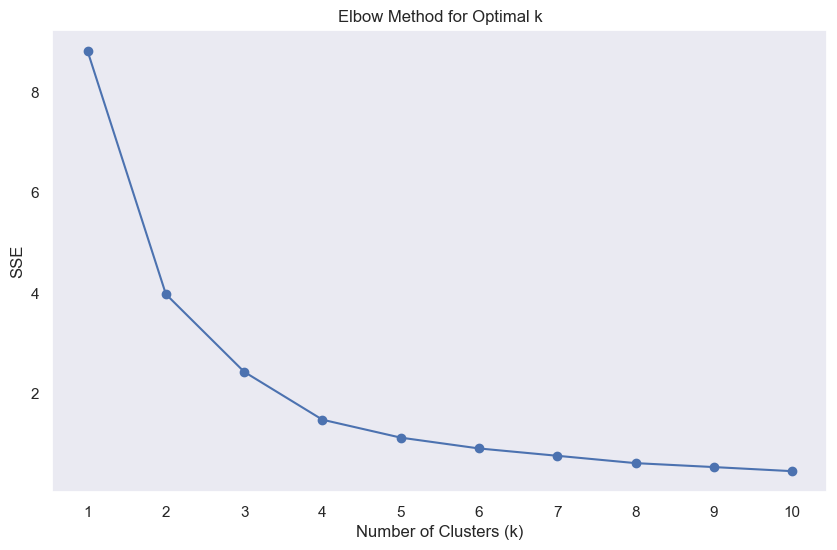

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
optimal_k = 3 # 4

kmeans = KMeans(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

# df_merged_filtered['cluster'] = labels

C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


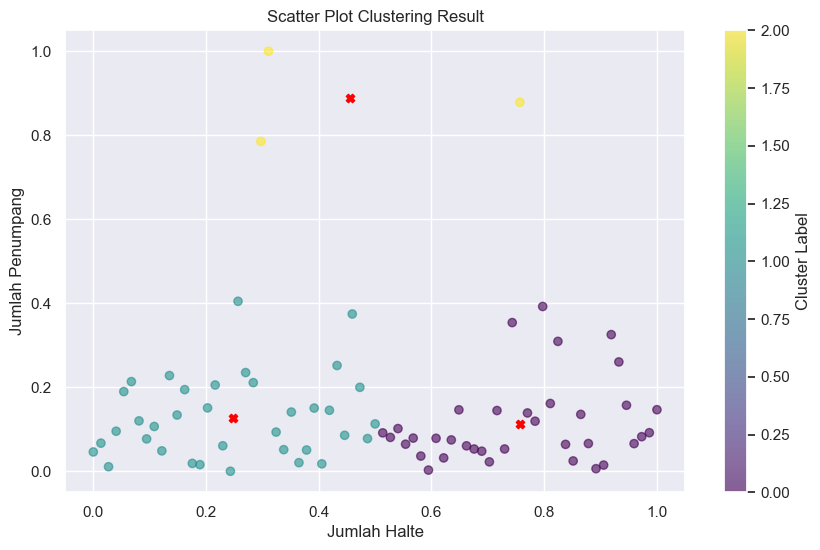

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [ ]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,33500,0,0,1
1,BLOK M - KOTA,BENDUNGAN HILIR,9428,0,2,0
2,BLOK M - KOTA,BLOK M,131797,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054,0,5,1
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6,1


In [ ]:
sse_final = kmeans.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 2.431119993164262
Silhouette Score: 0.7984341036703452
Davies-Bouldin Index: 0.3026598644037634
Data Index: (75, 6)


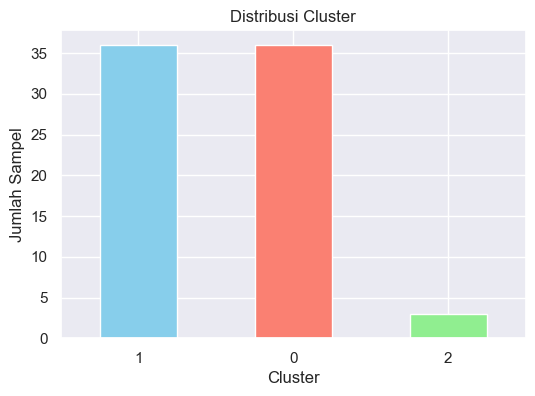

In [ ]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


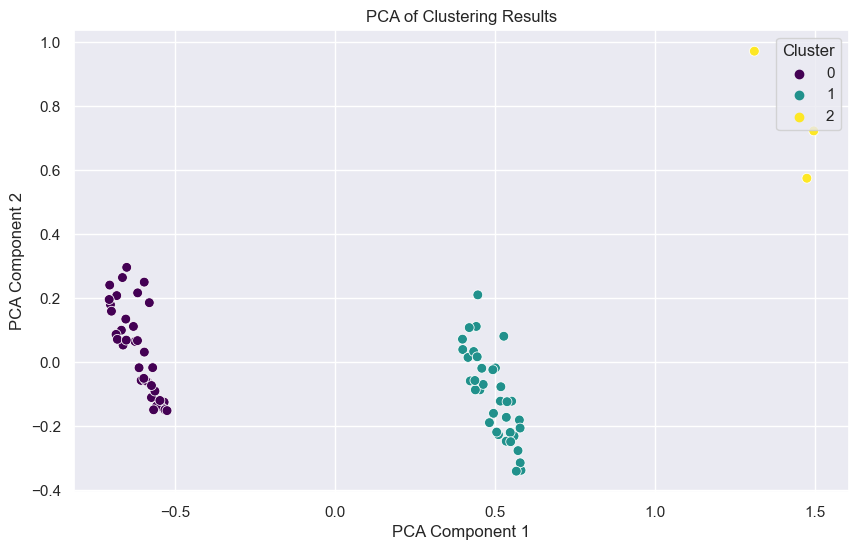

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Menyimpan data hasil clustering
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmeans_pagi_result.csv", index=False)

KeyError: "['corridor_name_encoded', 'shelter_name_encoded'] not found in axis"

# KMEANS Sore PROGRAM

In [ ]:
df_merged = pd.read_csv("new_rush_hour_sore.csv") # Data_merged_filtered_2
df_merged.head()

,corridor_name,shelter_name,number_of_transaction
0,BLOK M - KOTA,ASEAN,107803
1,BLOK M - KOTA,BENDUNGAN HILIR,41520
2,BLOK M - KOTA,BLOK M,357745
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460


In [ ]:
df_merged["corridor_name"].unique()

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI'], dtype=object)

## Feature Engginering

In [ ]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3
10,BLOK M - KOTA,KOTA,205466,0
0,BLOK M - KOTA,ASEAN,107803,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2


In [ ]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI'], dtype=object)

In [ ]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [ ]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3,40
10,BLOK M - KOTA,KOTA,205466,0,32
0,BLOK M - KOTA,ASEAN,107803,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,282951,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,127477,1,59
12,BLOK M - KOTA,MASJID AGUNG,95578,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,197357,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,73053,3,41


In [ ]:
df_merged.shape

(75, 5)

## Modeling

In [ ]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.575139
1,0.540541,0.039015
2,0.432432,0.264256
3,0.000000,0.131668
4,0.351351,0.154284


In [ ]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

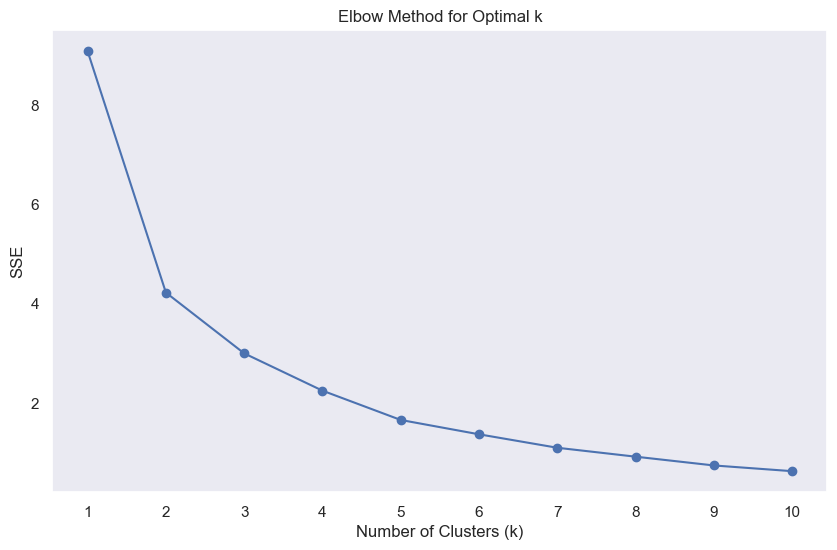

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
optimal_k = 3 # 4

kmeans = KMeans(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,0
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,1
2,BLOK M - KOTA,BLOK M,357745,0,4,2
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,2
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,2


In [ ]:
sse_final = kmeans.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 2.9991765785445743
Silhouette Score: 0.7867806414526395
Davies-Bouldin Index: 0.35130120103957324
Data Index: (75, 6)


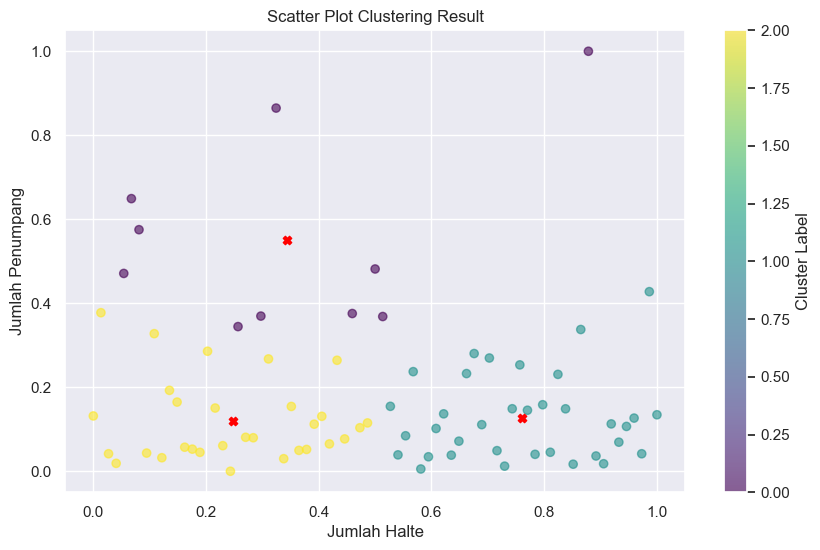

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [ ]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,0
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,1
2,BLOK M - KOTA,BLOK M,357745,0,4,2
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,2
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,2


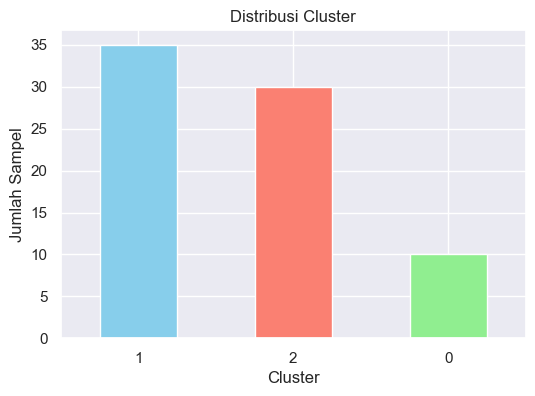

In [ ]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


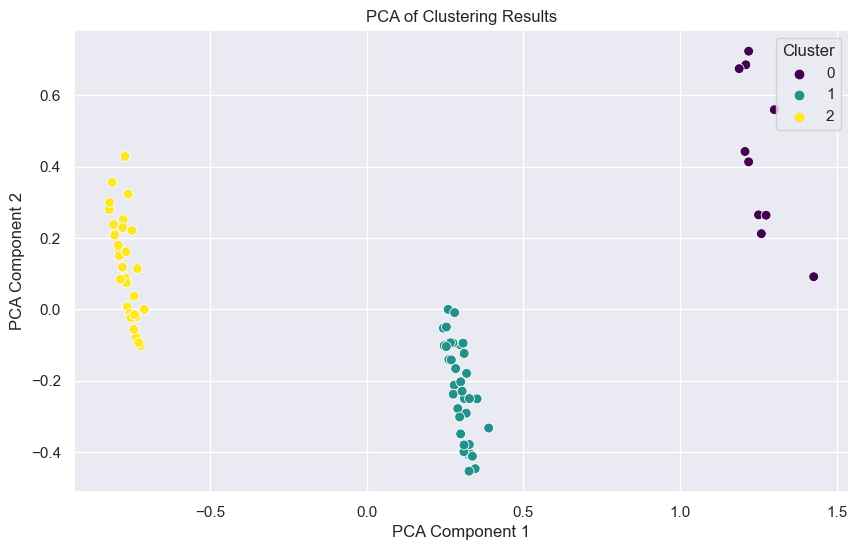

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmeans_sore_result.csv", index=False)

# KMEDOITS PAGI PROGRAM

In [ ]:
df_merged = pd.read_csv("new_rush_hour_pagi.csv") # Data_merged_filtered_2
df_merged.head()

,corridor_name,shelter_name,number_of_transaction
0,BLOK M - KOTA,ASEAN,33500
1,BLOK M - KOTA,BENDUNGAN HILIR,9428
2,BLOK M - KOTA,BLOK M,131797
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103


In [ ]:
df_merged["corridor_name"].unique()

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

## Feature Engginering

In [ ]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3
10,BLOK M - KOTA,KOTA,174282,0
0,BLOK M - KOTA,ASEAN,33500,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2


In [ ]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI', nan], dtype=object)

In [ ]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [ ]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,71569,3,40
10,BLOK M - KOTA,KOTA,174282,0,32
0,BLOK M - KOTA,ASEAN,33500,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,98460,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,539109,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,270371,1,59
12,BLOK M - KOTA,MASJID AGUNG,55300,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,602937,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,46120,3,41


In [ ]:
df_merged.shape

(75, 5)

## Modeling

In [ ]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.119962
1,0.540541,0.101635
2,0.432432,0.251815
3,0.000000,0.045974
4,0.351351,0.140953


In [ ]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X)
    sse.append(kmedoids.inertia_)

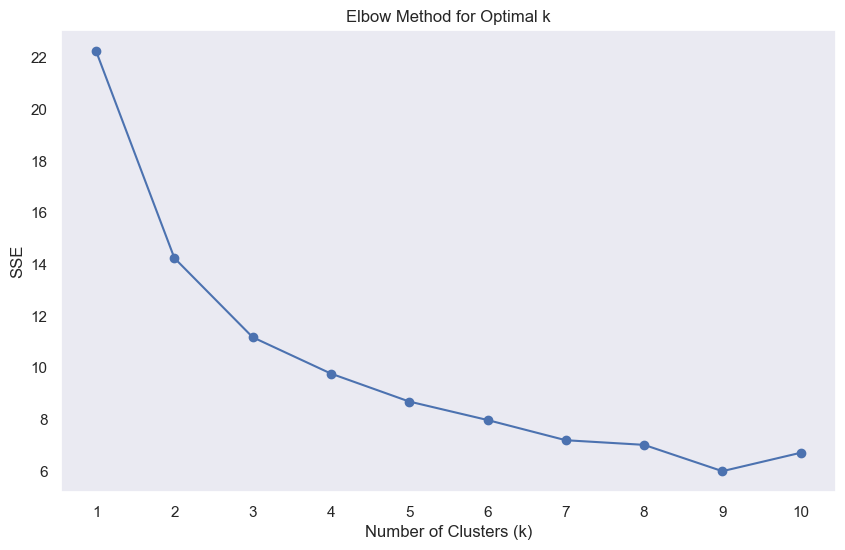

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
optimal_k = 3 # 4

kmedoids = KMedoids(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmedoids.fit_predict(X)
centroids = kmedoids.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

In [ ]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,33500,0,0,0
1,BLOK M - KOTA,BENDUNGAN HILIR,9428,0,2,1
2,BLOK M - KOTA,BLOK M,131797,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054,0,5,0
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6,1


In [ ]:
sse_final = kmedoids.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 11.180969539203724
Silhouette Score: 0.798055556824476
Davies-Bouldin Index: 0.2671260215200959


NameError: name 'df_merged_filtered' is not defined

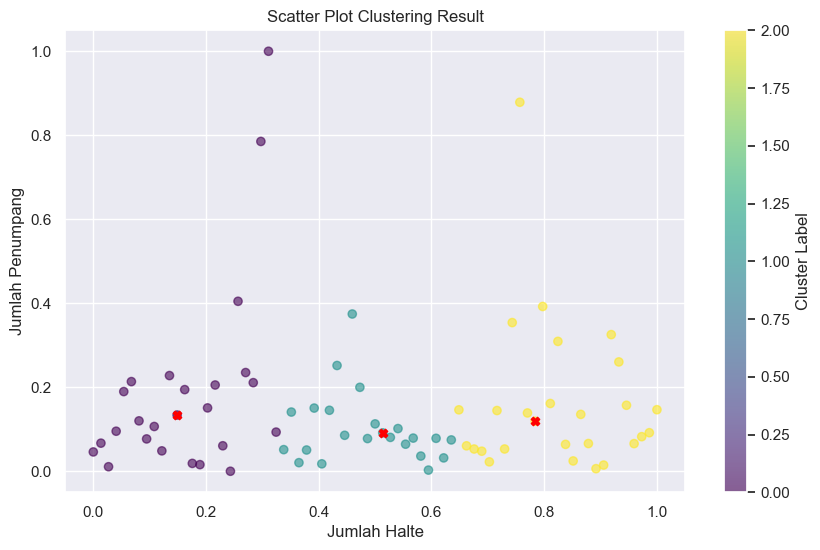

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [ ]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,33500,0,0,0
1,BLOK M - KOTA,BENDUNGAN HILIR,9428,0,2,1
2,BLOK M - KOTA,BLOK M,131797,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,148054,0,5,0
4,BLOK M - KOTA,BUNDARAN SENAYAN,84103,0,6,1


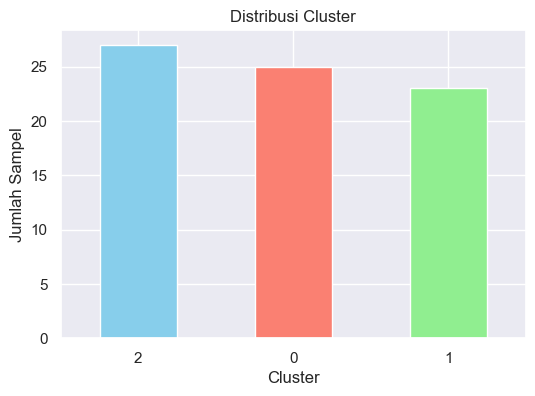

In [ ]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'brown'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


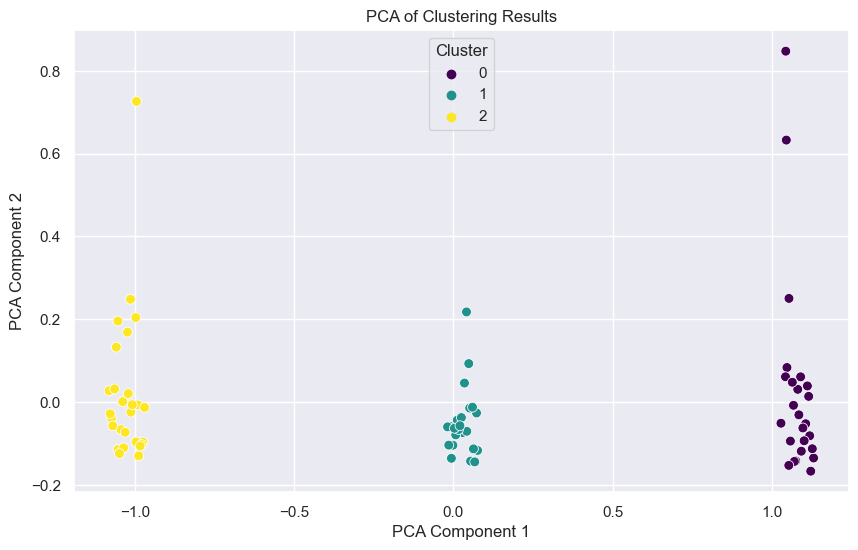

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmedoids_pagi_result.csv", index=False)

# KMEDOITS SORE PROGRAM

In [ ]:
df_merged = pd.read_csv("new_rush_hour_sore.csv") # Data_merged_filtered_2
df_merged.head()

,corridor_name,shelter_name,number_of_transaction
0,BLOK M - KOTA,ASEAN,107803
1,BLOK M - KOTA,BENDUNGAN HILIR,41520
2,BLOK M - KOTA,BLOK M,357745
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460


## Feature Engginering

In [ ]:
label_encoder = LabelEncoder()
df_merged['corridor_name_encoded'] = label_encoder.fit_transform(df_merged['corridor_name'])

df_merged.sample(n=5, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3
10,BLOK M - KOTA,KOTA,205466,0
0,BLOK M - KOTA,ASEAN,107803,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2


In [ ]:
label_encoder.classes_

array(['BLOK M - KOTA', 'KALIDERES - PASAR BARU', 'LEBAK BULUS - HARMONI',
       'PULOGADUNG 1 - HARMONI'], dtype=object)

In [ ]:
df_merged['shelter_name'].unique()

array(['ASEAN', 'BENDUNGAN HILIR', 'BLOK M', 'BUNDARAN HI ASTRA',
       'BUNDARAN SENAYAN', 'DUKUH ATAS', 'GLODOK', 'KARET',
       'KEBON SIRIH ARAH KOTA', 'KEJAKSAAN AGUNG', 'KOTA',
       'MANGGA BESAR ARAH KOTA', 'MASJID AGUNG', 'MH THAMRIN',
       'MONUMEN NASIONAL', 'POLDA METRO JAYA', 'SENAYAN BANK DKI',
       'TAMAN SARI', 'TELUK BETUNG', 'DAMAI', 'GROGOL', 'JELAMBAR',
       'JEMBATAN BARU', 'JEMBATAN GANTUNG', 'KALIDERES', 'PASAR BARU',
       'PESAKIH', 'PULO NANGKA', 'RAWA BUAYA', 'ROXY', 'SUMUR BOR',
       'TAMAN KOTA', 'DURI KEPA', 'GROGOL II', 'KEBAYORAN LAMA BUNGUR',
       'KEBON JERUK', 'KEDOYA ASSIDIQQIYAH', 'KEDOYA GREEN GARDEN',
       'KELAPA DUA SASAK', 'LEBAK BULUS', 'PERMATA HIJAU',
       'PERMATA HIJAU RS MEDIKA', 'PETOJO', 'PONDOK INDAH I',
       'PONDOK INDAH II', 'PONDOK PINANG', 'POS PENGUMBEN',
       'PS.KEBAYORAN LAMA', 'RS TARAKAN',
       'S. PARMAN PODOMORO CITY ARAH PLUIT', 'SIMPRUG',
       'TANAH KUSIR KODIM', 'TOMANG MANDALA', 'BALAI KOTA',

In [ ]:
label_encoder = LabelEncoder()
df_merged['shelter_name_encoded'] = label_encoder.fit_transform(df_merged['shelter_name'])

df_merged.sample(n=10, random_state=42)

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6
63,PULOGADUNG 1 - HARMONI,PASAR CEMPAKA PUTIH,39556,3,40
10,BLOK M - KOTA,KOTA,205466,0,32
0,BLOK M - KOTA,ASEAN,107803,0,0
35,LEBAK BULUS - HARMONI,KEBON JERUK,124462,2,26
61,PULOGADUNG 1 - HARMONI,JUANDA,282951,3,22
28,KALIDERES - PASAR BARU,RAWA BUAYA,127477,1,59
12,BLOK M - KOTA,MASJID AGUNG,95578,0,36
69,PULOGADUNG 1 - HARMONI,PULO GADUNG,197357,3,56
64,PULOGADUNG 1 - HARMONI,PASAR SENEN,73053,3,41


In [ ]:
df_merged.shape

(75, 5)

## Modeling

In [ ]:
X = pd.concat([df_merged['shelter_name_encoded'].reset_index(drop=True), df_merged['number_of_transaction'].reset_index(drop=True)], axis=1)
X = X.sample(frac=1, random_state=42).reset_index(drop=True)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)

X.head()

,shelter_name_encoded,number_of_transaction
0,0.081081,0.575139
1,0.540541,0.039015
2,0.432432,0.264256
3,0.000000,0.131668
4,0.351351,0.154284


In [ ]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 11)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X)
    sse.append(kmedoids.inertia_)

In [ ]:
print(sse)

[22.967925195223273, 14.956651139206102, 12.474586333176969, 10.694271484119586, 10.258256820464466, 8.843141540760179, 8.563096132354827, 8.374702361784752, 8.199179841182879, 7.761010897551474]


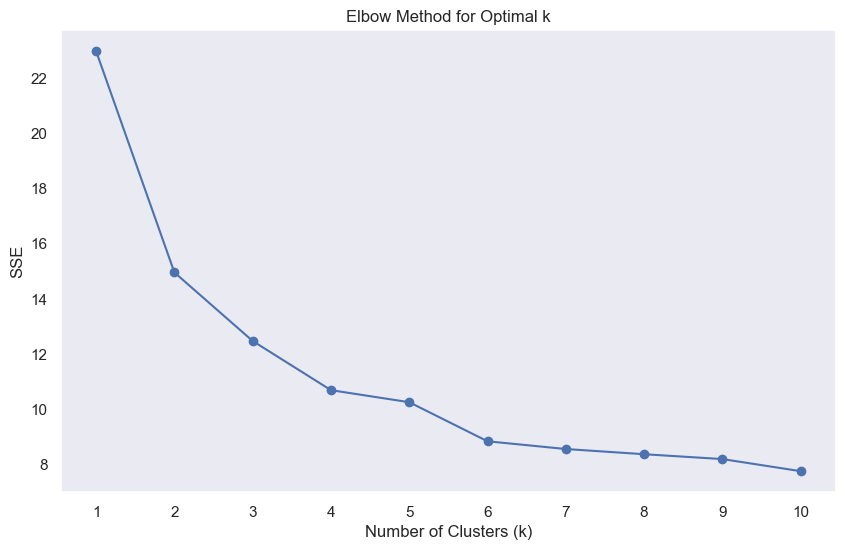

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
optimal_k = 3 # 4

kmedoids = KMedoids(n_clusters=optimal_k, max_iter=10, random_state=42)
labels = kmedoids.fit_predict(X)
centroids = kmedoids.cluster_centers_

X['cluster'] = labels
df_merged['cluster'] = labels

In [ ]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,2
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,1
2,BLOK M - KOTA,BLOK M,357745,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,2
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,1


In [ ]:
sse_final = kmedoids.inertia_
silhouette_avg = silhouette_score(X, X['cluster'])
dbi = davies_bouldin_score(X, X['cluster'])

print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged.shape}")

SSE: 12.474586333176969
Silhouette Score: 0.7781267263375853
Davies-Bouldin Index: 0.3127877073813639
Data Index: (75, 6)


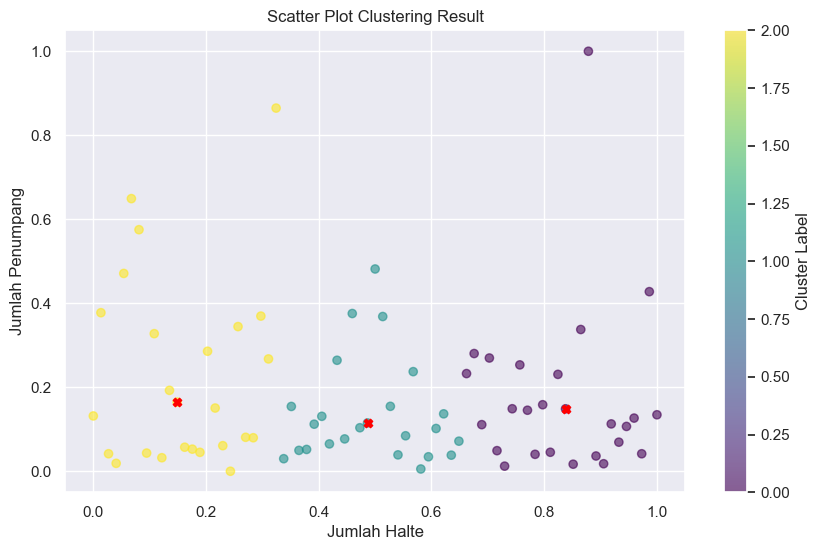

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
        X['shelter_name_encoded'],
        X['number_of_transaction'],
          c=X['cluster'],
          cmap='viridis',
          alpha=0.6)

plt.scatter(centroids[:, 0],
          centroids[:, 1],
          c='red',
          marker="X",
          label="Centroids")

plt.xlabel('Jumlah Halte')
plt.ylabel('Jumlah Penumpang')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

In [ ]:
df_merged.head()

,corridor_name,shelter_name,number_of_transaction,corridor_name_encoded,shelter_name_encoded,cluster
0,BLOK M - KOTA,ASEAN,107803,0,0,2
1,BLOK M - KOTA,BENDUNGAN HILIR,41520,0,2,1
2,BLOK M - KOTA,BLOK M,357745,0,4,1
3,BLOK M - KOTA,BUNDARAN HI ASTRA,488951,0,5,2
4,BLOK M - KOTA,BUNDARAN SENAYAN,434460,0,6,1


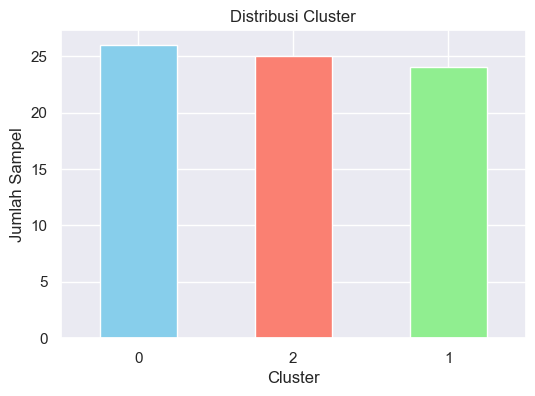

In [ ]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'brown'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Raqwan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


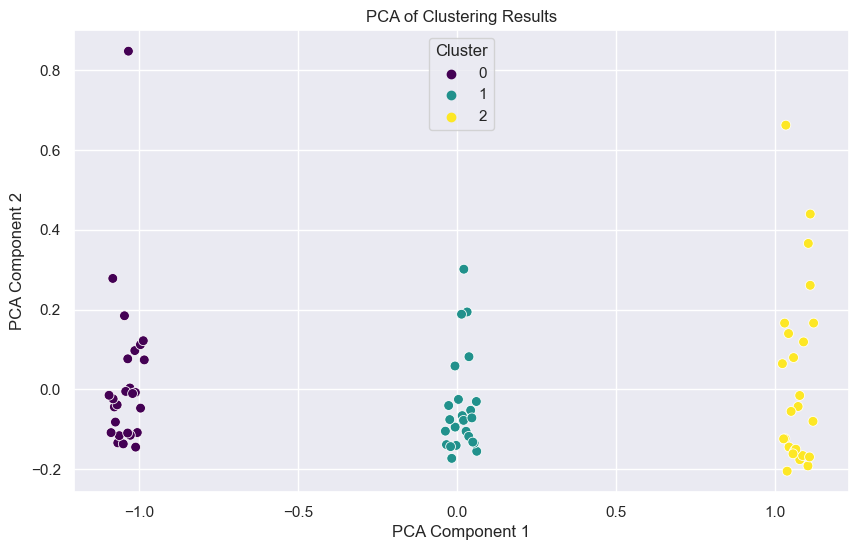

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('PCA of Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_merged = df_merged.drop(columns=['corridor_name_encoded', 'shelter_name_encoded'])
df_merged.to_csv("kmedoids_sore_result.csv", index=False)

In [ ]:
# Note Cell di bawah abaikan saja

# Filter Data 1

In [ ]:
data = pd.read_csv("Data_1.csv")

In [ ]:
data.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,2023/12/1,BLOK M - KOTA,BLOK M,0,30
1,2023/12/1,BLOK M - KOTA,MASJID AGUNG,0,1
2,2023/12/1,BLOK M - KOTA,BUNDARAN SENAYAN,0,4
3,2023/12/1,BLOK M - KOTA,SENAYAN BANK DKI,0,18
4,2023/12/1,BLOK M - KOTA,POLDA METRO JAYA,0,15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134141 entries, 0 to 134140
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   transaction_date          134141 non-null  object
 1   corridor_name_var         134141 non-null  object
 2   shelter_name_var          134141 non-null  object
 3   hour_int                  134141 non-null  int64 
 4   count_of_transaction_int  134141 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 5.1+ MB


In [ ]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

data.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,2023-12-01,BLOK M - KOTA,BLOK M,0,30
1,2023-12-01,BLOK M - KOTA,MASJID AGUNG,0,1
2,2023-12-01,BLOK M - KOTA,BUNDARAN SENAYAN,0,4
3,2023-12-01,BLOK M - KOTA,SENAYAN BANK DKI,0,18
4,2023-12-01,BLOK M - KOTA,POLDA METRO JAYA,0,15


In [ ]:
data.shape

(134141, 5)

In [ ]:
df_weekdays = data[data['transaction_date'].dt.weekday < 5]

df_weekdays.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,2023-12-01,BLOK M - KOTA,BLOK M,0,30
1,2023-12-01,BLOK M - KOTA,MASJID AGUNG,0,1
2,2023-12-01,BLOK M - KOTA,BUNDARAN SENAYAN,0,4
3,2023-12-01,BLOK M - KOTA,SENAYAN BANK DKI,0,18
4,2023-12-01,BLOK M - KOTA,POLDA METRO JAYA,0,15


In [ ]:
df_weekdays.info(), df_weekdays.shape

<class 'pandas.core.frame.DataFrame'>
Index: 95520 entries, 0 to 133626
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transaction_date          95520 non-null  datetime64[ns]
 1   corridor_name_var         95520 non-null  object        
 2   shelter_name_var          95520 non-null  object        
 3   hour_int                  95520 non-null  int64         
 4   count_of_transaction_int  95520 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.4+ MB


(None, (95520, 5))

In [ ]:
df_weekdays = df_weekdays[~df_weekdays['shelter_name_var'].str.contains("ARAH BLOK M", case=False, na=False)]

In [ ]:
df_weekdays.shape

(82178, 5)

In [ ]:
df_weekdays.head(15)

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,2023-12-01,BLOK M - KOTA,BLOK M,0,30
1,2023-12-01,BLOK M - KOTA,MASJID AGUNG,0,1
2,2023-12-01,BLOK M - KOTA,BUNDARAN SENAYAN,0,4
3,2023-12-01,BLOK M - KOTA,SENAYAN BANK DKI,0,18
4,2023-12-01,BLOK M - KOTA,POLDA METRO JAYA,0,15
5,2023-12-01,BLOK M - KOTA,KARET,0,14
6,2023-12-01,BLOK M - KOTA,DUKUH ATAS,0,3
7,2023-12-01,BLOK M - KOTA,TELUK BETUNG,0,7
8,2023-12-01,BLOK M - KOTA,BUNDARAN HI ASTRA,0,13
9,2023-12-01,BLOK M - KOTA,MONUMEN NASIONAL,0,9


In [ ]:
df_weekdays.to_csv("Data_1_filtered.csv", index=False)

# Filter Data 2

In [ ]:
data = pd.read_csv("Data_2.csv")

In [ ]:
data.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,1/12/2023,KALIDERES - PASAR BARU,GROGOL,0,1
1,1/12/2023,KALIDERES - PASAR BARU,GROGOL,1,1
2,1/12/2023,KALIDERES - PASAR BARU,GROGOL,4,2
3,1/12/2023,KALIDERES - PASAR BARU,GROGOL,5,21
4,1/12/2023,KALIDERES - PASAR BARU,GROGOL,6,129


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333885 entries, 0 to 333884
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   transaction_date          333885 non-null  object
 1   corridor_name_var         333885 non-null  object
 2   shelter_name_var          333885 non-null  object
 3   hour_int                  333885 non-null  int64 
 4   count_of_transaction_int  333885 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 12.7+ MB


In [ ]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], errors='coerce', dayfirst=True)

data['transaction_date'] = data['transaction_date'].dt.strftime('%Y-%m-%d')

df_weekdays = data[data['transaction_date'].apply(lambda x: pd.Timestamp(x).weekday() < 5)]

df_weekdays.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,2023-12-01,KALIDERES - PASAR BARU,GROGOL,0,1
1,2023-12-01,KALIDERES - PASAR BARU,GROGOL,1,1
2,2023-12-01,KALIDERES - PASAR BARU,GROGOL,4,2
3,2023-12-01,KALIDERES - PASAR BARU,GROGOL,5,21
4,2023-12-01,KALIDERES - PASAR BARU,GROGOL,6,129


In [ ]:
df_weekdays.info(), df_weekdays.shape

<class 'pandas.core.frame.DataFrame'>
Index: 237604 entries, 0 to 332614
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   transaction_date          237604 non-null  object
 1   corridor_name_var         237604 non-null  object
 2   shelter_name_var          237604 non-null  object
 3   hour_int                  237604 non-null  int64 
 4   count_of_transaction_int  237604 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.9+ MB


(None, (237604, 5))

In [ ]:
df_weekdays = df_weekdays[~df_weekdays['shelter_name_var'].str.contains("ARAH P.RANTI", case=False, na=False)]

In [ ]:
df_weekdays.shape

(233038, 5)

In [ ]:
df_weekdays.to_csv("Data_2_filtered.csv", index=False)

# Merging Data & Create Rush Our

In [ ]:
df1 = pd.read_csv("Data_1_filtered.csv")
df2 = pd.read_csv("Data_2_filtered.csv")

df_merged = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df_merged.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,2023-12-01,BLOK M - KOTA,BLOK M,0,30
1,2023-12-01,BLOK M - KOTA,MASJID AGUNG,0,1
2,2023-12-01,BLOK M - KOTA,BUNDARAN SENAYAN,0,4
3,2023-12-01,BLOK M - KOTA,SENAYAN BANK DKI,0,18
4,2023-12-01,BLOK M - KOTA,POLDA METRO JAYA,0,15


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315216 entries, 0 to 315215
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   transaction_date          315216 non-null  object
 1   corridor_name_var         315216 non-null  object
 2   shelter_name_var          315216 non-null  object
 3   hour_int                  315216 non-null  int64 
 4   count_of_transaction_int  315216 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 12.0+ MB


In [ ]:
df_merged.to_csv("Data_merged_filtered.csv", index=False)

In [ ]:
df = pd.read_csv("Data_merged_filtered.csv")

df.shape

(315216, 5)

In [ ]:
df.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int
0,2023-12-01,BLOK M - KOTA,BLOK M,0,30
1,2023-12-01,BLOK M - KOTA,MASJID AGUNG,0,1
2,2023-12-01,BLOK M - KOTA,BUNDARAN SENAYAN,0,4
3,2023-12-01,BLOK M - KOTA,SENAYAN BANK DKI,0,18
4,2023-12-01,BLOK M - KOTA,POLDA METRO JAYA,0,15


In [ ]:
df['rush_hour'] = np.where(df['hour_int'].between(5, 9), 'pagi',
                                   np.where(df['hour_int'].between(16, 20), 'sore', 'tidak sibuk'))

In [ ]:
df.head()

,transaction_date,corridor_name_var,shelter_name_var,hour_int,count_of_transaction_int,rush_hour
0,2023-12-01,BLOK M - KOTA,BLOK M,0,30,tidak sibuk
1,2023-12-01,BLOK M - KOTA,MASJID AGUNG,0,1,tidak sibuk
2,2023-12-01,BLOK M - KOTA,BUNDARAN SENAYAN,0,4,tidak sibuk
3,2023-12-01,BLOK M - KOTA,SENAYAN BANK DKI,0,18,tidak sibuk
4,2023-12-01,BLOK M - KOTA,POLDA METRO JAYA,0,15,tidak sibuk


In [ ]:
df.shape

(315216, 6)

In [ ]:
df.to_csv("Data_merged_filtered_2.csv", index=False)

# New Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set()

# KMEANS

In [ ]:
df_merged = pd.read_csv("rush_hour_sore.csv")
df_merged.head()

,Koridor,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte
0,BLOK M - KOTA,6860060,12.9,17
1,KALIDERES - PASAR BARU,1874288,24.2,12
2,LEBAK BULUS - HARMONI,3360266,19.0,20
3,PULOGADUNG 1 - HARMONI,2623212,16.0,22


In [ ]:
label_encoder = LabelEncoder()
df_merged['koridor_encoded'] = label_encoder.fit_transform(df_merged['Koridor'])

In [ ]:
X = df_merged.copy()
X = X.iloc[:, 1:]
X.head()

,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte,koridor_encoded
0,6860060,12.9,17,0
1,1874288,24.2,12,1
2,3360266,19.0,20,2
3,2623212,16.0,22,3


In [ ]:
sse = []

# Coba k dari 1 sampai 10

k_values = range(1, 5)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

In [ ]:
print(sse)

[14592406956806.2, 1104088791151.0933, 271624299465.0, 0.0]


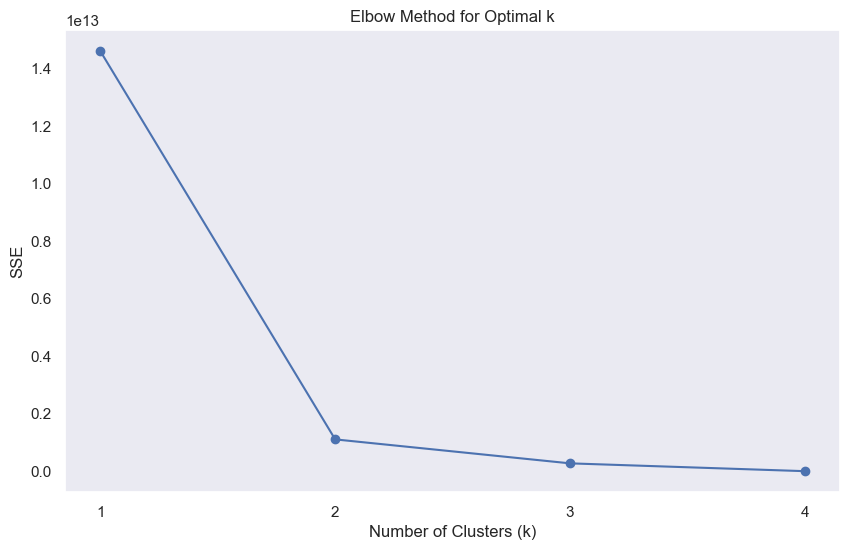

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
df_merged['cluster'] = kmeans.labels_

C:\Users\Raqwan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df_merged.head()

,Koridor,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte,koridor_encoded,cluster
0,BLOK M - KOTA,6860060,12.9,17,0,1
1,KALIDERES - PASAR BARU,1874288,24.2,12,1,0
2,LEBAK BULUS - HARMONI,3360266,19.0,20,2,2
3,PULOGADUNG 1 - HARMONI,2623212,16.0,22,3,2


In [ ]:
sse_final = kmeans.inertia_
silhouette_avg = silhouette_score(X, df_merged['cluster'])
dbi = davies_bouldin_score(X, df_merged['cluster'])

# Tampilkan hasil evaluasi
print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {df_merged_filtered.shape}")

SSE: 271624299465.0
Silhouette Score: 0.1299608520061511
Davies-Bouldin Index: 0.2516176735009634
Data Index: (141931, 83)


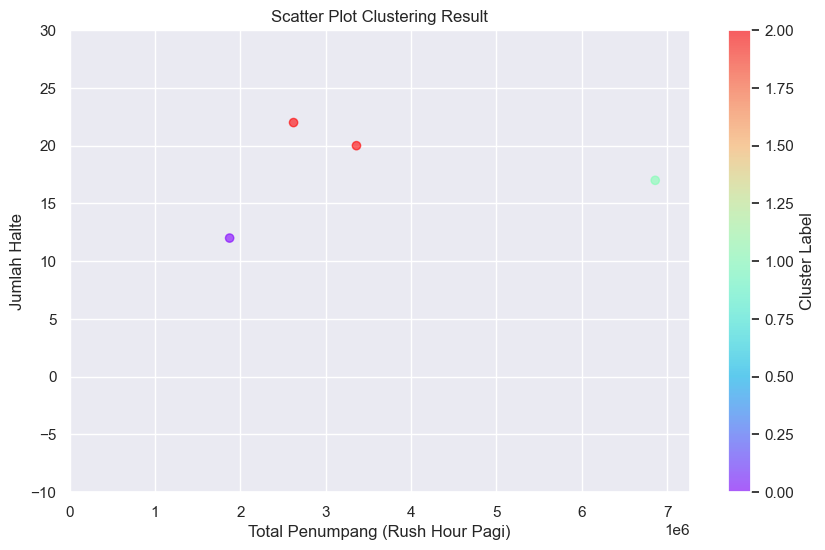

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_merged['Total Penumpang (Rush Hour Sore)'],
                      df_merged['Jumlah Halte'],
                      c=df_merged['cluster'],
                      cmap='rainbow',
                      alpha=0.6)

plt.xlabel('Total Penumpang (Rush Hour Pagi)')
plt.ylabel('Jumlah Halte')

plt.xlim(-10, 7263116)
plt.ylim(-10, 30)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

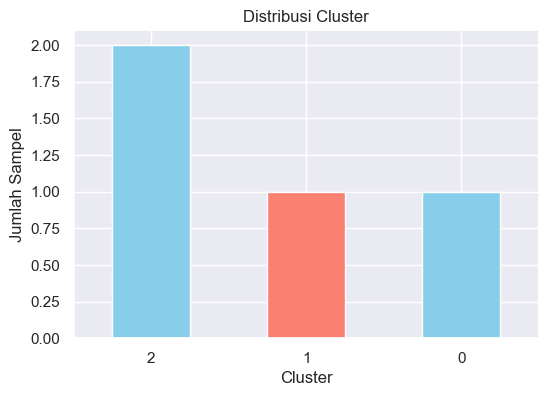

In [ ]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_merged = df_merged.drop(columns=['koridor_encoded'])
df_merged.to_csv("kmeans_cluster_pagi.csv", index=False)

# KMEDOIDS

In [ ]:
df_merged = pd.read_csv("rush_hour_sore.csv")
df_merged.head()

,Koridor,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte
0,BLOK M - KOTA,6860060,12.9,17
1,KALIDERES - PASAR BARU,1874288,24.2,12
2,LEBAK BULUS - HARMONI,3360266,19.0,20
3,PULOGADUNG 1 - HARMONI,2623212,16.0,22


In [ ]:
label_encoder = LabelEncoder()
df_merged['koridor_encoded'] = label_encoder.fit_transform(df_merged['Koridor'])

In [ ]:
X = df_merged.copy()
X = X.iloc[:, 1:]
X.head()

,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte,koridor_encoded
0,6860060,12.9,17,0
1,1874288,24.2,12,1
2,3360266,19.0,20,2
3,2623212,16.0,22,3


In [ ]:
sse = []

k_values = range(1, 5)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X)
    sse.append(kmedoids.inertia_)

In [ ]:
print(sse)

[5722826.000047639, 4236848.00001667, 3499794.000007172, 0.0]


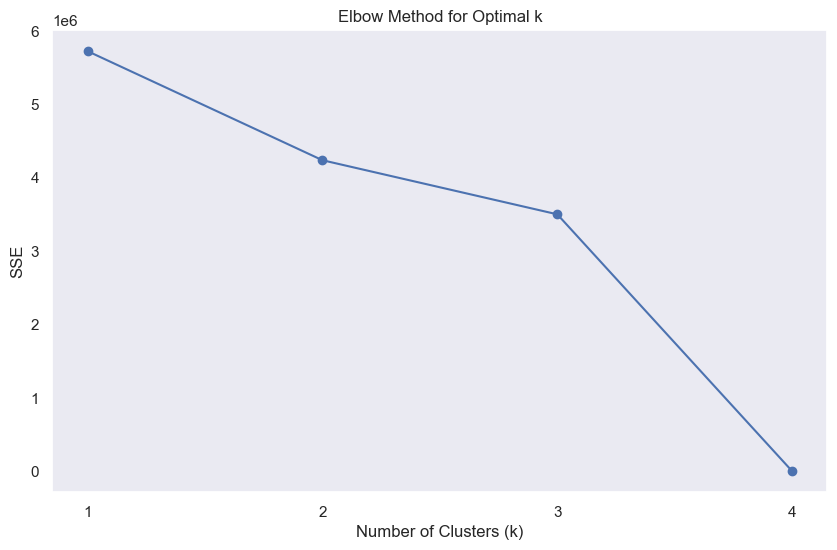

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
optimal_k = 3

kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(X)
df_merged['cluster'] = kmedoids.labels_

In [ ]:
df_merged.head()

,Koridor,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte,koridor_encoded,cluster
0,BLOK M - KOTA,6860060,12.9,17,0,0
1,KALIDERES - PASAR BARU,1874288,24.2,12,1,2
2,LEBAK BULUS - HARMONI,3360266,19.0,20,2,0
3,PULOGADUNG 1 - HARMONI,2623212,16.0,22,3,1


In [ ]:
sse_final = kmedoids.inertia_
silhouette_avg = silhouette_score(X, df_merged['cluster'])
dbi = davies_bouldin_score(X, df_merged['cluster'])

# Tampilkan hasil evaluasi
print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {X.shape}")

SSE: 3499794.000007172
Silhouette Score: -0.15385948342996586
Davies-Bouldin Index: 0.6493477032057797
Data Index: (4, 4)


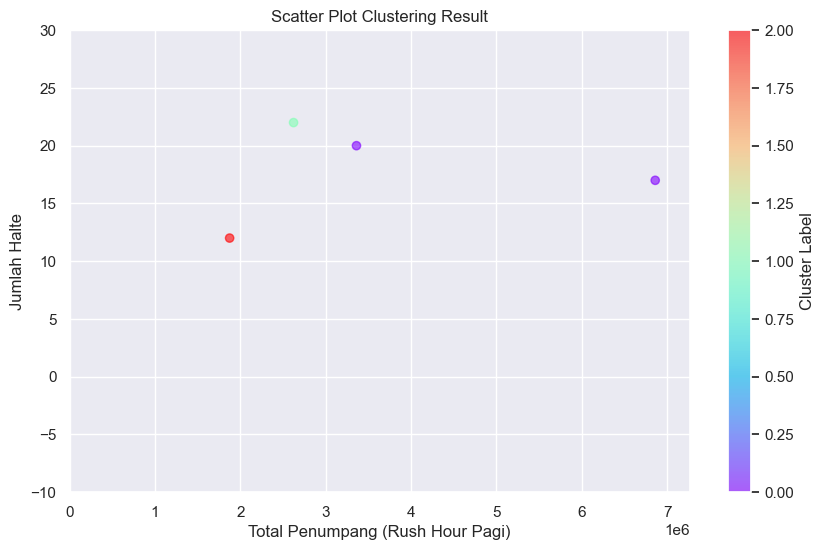

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_merged['Total Penumpang (Rush Hour Sore)'],
                      df_merged['Jumlah Halte'],
                      c=df_merged['cluster'],
                      cmap='rainbow',
                      alpha=0.6)

plt.xlabel('Total Penumpang (Rush Hour Pagi)')
plt.ylabel('Jumlah Halte')

plt.xlim(-10, 7263116)
plt.ylim(-10, 30)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

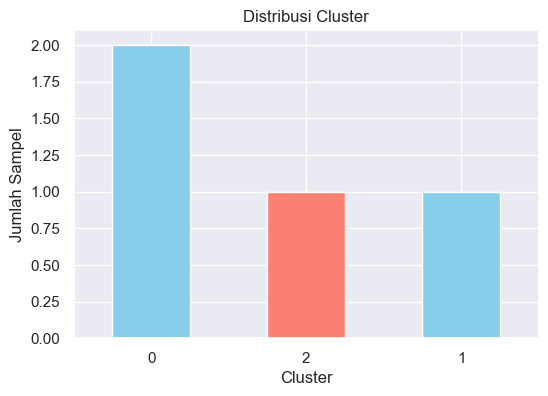

In [ ]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_merged = df_merged.drop(columns=['koridor_encoded'])
df_merged.to_csv("kmedoids_cluster_pagi.csv", index=False)

# KMEDOIDS Normalisasi

In [ ]:
df_merged = pd.read_csv("rush_hour_sore.csv")
df_merged.head()

,Koridor,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte
0,BLOK M - KOTA,6860060,12.9,17
1,KALIDERES - PASAR BARU,1874288,24.2,12
2,LEBAK BULUS - HARMONI,3360266,19.0,20
3,PULOGADUNG 1 - HARMONI,2623212,16.0,22


In [ ]:
label_encoder = LabelEncoder()
df_merged['koridor_encoded'] = label_encoder.fit_transform(df_merged['Koridor'])

In [ ]:
X = df_merged.copy()
X = X.iloc[:, 1:]
X.head()

,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte,koridor_encoded
0,6860060,12.9,17,0
1,1874288,24.2,12,1
2,3360266,19.0,20,2
3,2623212,16.0,22,3


In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)
X.head()

,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte,koridor_encoded
0,1.000000,0.000000,0.5,0.000000
1,0.000000,1.000000,0.0,0.333333
2,0.298044,0.539823,0.8,0.666667
3,0.150212,0.274336,1.0,1.000000


In [ ]:
sse = []

k_values = range(1, 5)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X)
    sse.append(kmedoids.inertia_)

In [ ]:
print(sse)

[2.6672325161481063, 2.1738275547734665, 1.1483013341103283, 0.0]


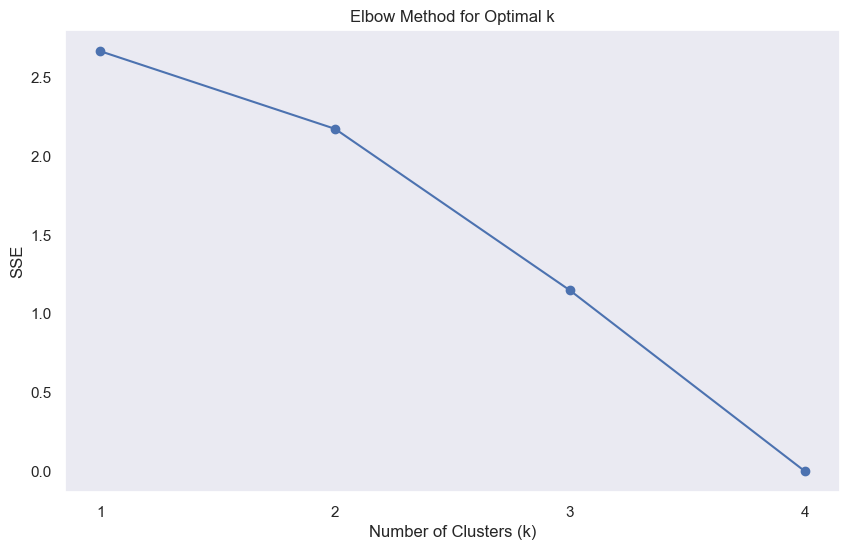

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()

In [ ]:
optimal_k = 3

kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(X)
df_merged['cluster'] = kmedoids.labels_

In [ ]:
df_merged.head()

,Koridor,Total Penumpang (Rush Hour Sore),Panjang Rute (km),Jumlah Halte,koridor_encoded,cluster
0,BLOK M - KOTA,6860060,12.9,17,0,0
1,KALIDERES - PASAR BARU,1874288,24.2,12,1,2
2,LEBAK BULUS - HARMONI,3360266,19.0,20,2,0
3,PULOGADUNG 1 - HARMONI,2623212,16.0,22,3,1


In [ ]:
sse_final = kmedoids.inertia_
silhouette_avg = silhouette_score(X, df_merged['cluster'])
dbi = davies_bouldin_score(X, df_merged['cluster'])

# Tampilkan hasil evaluasi
print(f"SSE: {sse_final}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi}")
print(f"Data Index: {X.shape}")

SSE: 1.1483013341103283
Silhouette Score: -0.09320877794794868
Davies-Bouldin Index: 0.5868969043883258
Data Index: (4, 4)


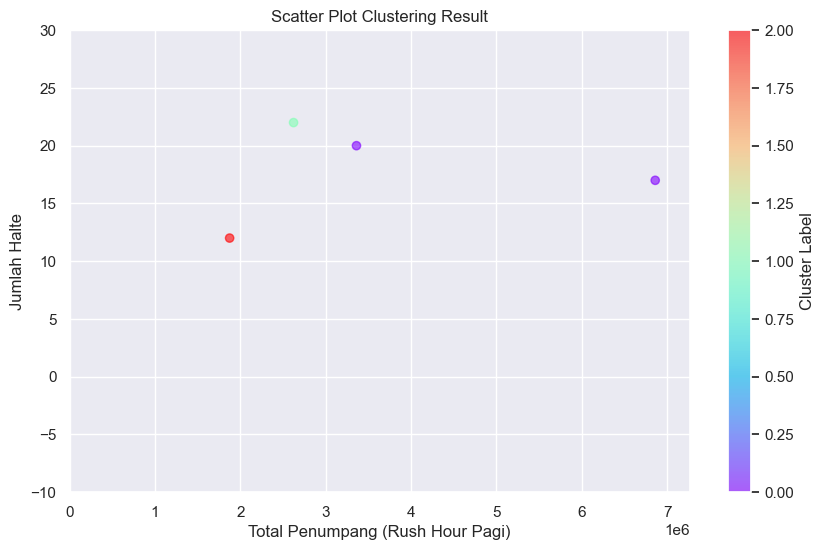

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_merged['Total Penumpang (Rush Hour Sore)'],
                      df_merged['Jumlah Halte'],
                      c=df_merged['cluster'],
                      cmap='rainbow',
                      alpha=0.6)

plt.xlabel('Total Penumpang (Rush Hour Pagi)')
plt.ylabel('Jumlah Halte')

plt.xlim(-10, 7263116)
plt.ylim(-10, 30)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title("Scatter Plot Clustering Result")
plt.show()

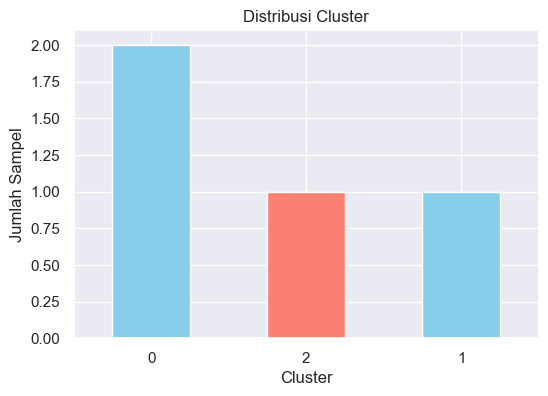

In [ ]:
plt.figure(figsize=(6, 4))
df_merged['cluster'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_merged = df_merged.drop(columns=['koridor_encoded'])
df_merged.to_csv("kmedoids_normalisasi_cluster_pagi.csv", index=False)